# `IEEE-CIS Fraud Detection`

**Тип задачи:** `Классификация`

---
# 📋 Содержание
1.  [Импорт библиотек](##-импорт-библиотек)
2.  [Директории](#-директории)
3.  [Загрузка данных](#️-загрузка-данных)  
4.  [EDA](#️-eda)  
4.1 [Анализ целевой переменной](##-анализ-целевой-переменной)  
4.2 [Анализ показателей](##-анализ-показателей)  
    4.2.1  [main_features](###--main-features)  
    4.2.1  [other_features_SFA](###--other-features-SFA)  

# 1. Импорт библиотек

In [1]:
import os
import sys
sys.path.append('../')

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from utils.eda_utils import *

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', 450)

# 2. Директории

In [3]:
#
curr_dir = os.getcwd()

#
main_dir = os.path.split(curr_dir)[0]

#
data_dir = os.path.join(main_dir, 'data/')
#
raw_data_dir = os.path.join(data_dir, 'raw/')
#
proc_data_dir = os.path.join(data_dir, 'processed/')

# 
docs_dir = os.path.join(main_dir, 'docs/')

# З Загрузка данных

In [4]:
# data
df_name = 'data.pqt'
df = pd.read_parquet(f'{proc_data_dir}{df_name}')

print(f'data size: {df.shape}')

# valid features
val_features_name = 'valid_features.xlsx'
val_features = pd.read_excel(f'{docs_dir}{val_features_name}')

val_features_ = val_features[val_features['valid_flag'] == 1]
print(f'valid_features size: {val_features.shape}')

# final_cols
data_cols = [*val_features_['attribute'], 'target']
print(f'final_features size: {len(data_cols)}')

data size: (1097231, 494)
valid_features size: (410, 19)
final_features size: 372


In [5]:
#
df['sample_type'].value_counts(dropna=False)

sample_type
None     506691
TRAIN    350849
TEST     150365
OOT       89326
Name: count, dtype: int64

In [6]:
# train/test/oot
df_train = df[df['sample_type'] == 'TRAIN'][data_cols]
df_test = df[df['sample_type'] == 'TEST'][data_cols]
df_oot = df[df['sample_type'] == 'OOT'][data_cols]

In [7]:
df_train.shape

(350849, 372)

In [8]:
print(df_train.shape)
print(df_test.shape)
print(df_oot.shape)

(350849, 372)
(150365, 372)
(89326, 372)


# 4. EDA

## 4.1 Анализ целевой переменной

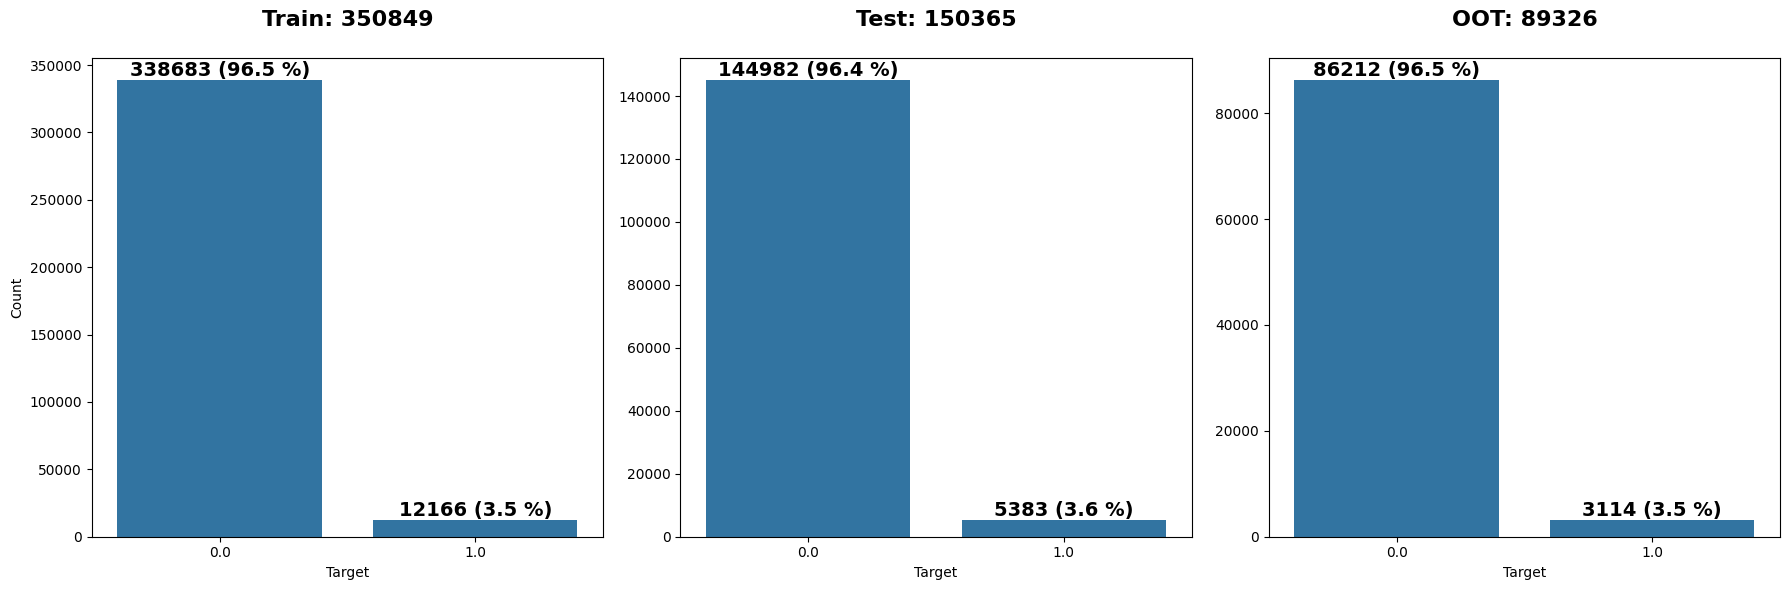

In [9]:
# dist plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

datasets = [(df_train, 'Train'), (df_test, 'Test'), (df_oot, 'OOT')]

for idx, (data, title) in enumerate(datasets):
    sns.countplot(data=data, x='target', ax=axes[idx], linewidth=1)
    
    # obs
    counts = data['target'].value_counts().sort_index()
    percents = (counts / len(data) * 100).round(1)
    
    # text
    for i, (count, pct) in enumerate(zip(counts, percents)):
        axes[idx].text(i, count, f'{count} ({pct} %)', 
                       ha='center', va='bottom', fontsize=14, weight='bold')
    
    axes[idx].set_title(f'{title}: {len(data)}' '\n', fontsize=16, weight='bold')
    axes[idx].set_xlabel('Target')
    axes[idx].set_ylabel('')
    if idx == 0:
        axes[idx].set_ylabel('Count')

plt.tight_layout()
plt.show()

## 4.2 Анализ показателей

In [10]:
# main_features
main_features = ['TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4',
                 'card5', 'card6', 'addr1', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain',
                 'DeviceType', 'DeviceInfo', 'hour']

# C-group
c_feat = [x for x in df_train.columns if x.startswith('C')]

# D-group
d_feat = [x for x in df_train.columns if x.startswith('D') and x not in main_features]

# M-group
m_feat = [x for x in df_train.columns if x.startswith('M')]

# V-group
v_feat = [x for x in df_train.columns if x.startswith('V')]

### 4.2.1 main_features

In [11]:
# ProductCD
pvt_table(data=df_train,
          index_name='ProductCD',
          dropna_values=False)

,ProductCD,count_target,sum_target,mean_target
0,C,41290,4677.0,0.1133
1,H,21219,987.0,0.0465
2,R,23396,833.0,0.0356
3,S,6013,366.0,0.0609
4,W,258931,5303.0,0.0205


In [12]:
# card4
pvt_table(data=df_train,
          index_name='card4',
          dropna_values=False).fillna('NONE_TYPE')

,card4,count_target,sum_target,mean_target
0,american express,5204,144.0,0.0277
1,discover,3981,308.0,0.0774
2,mastercard,111938,3875.0,0.0346
3,visa,229120,7819.0,0.0341
4,NONE_TYPE,606,20.0,0.0330


In [13]:
# card6
pvt_table(data=df_train,
          index_name='card6',
          dropna_values=False).fillna('NONE_TYPE')

,card6,count_target,sum_target,mean_target
0,charge card,10,0.0,0.0000
1,credit,89398,5947.0,0.0665
2,debit,260816,6200.0,0.0238
3,debit or credit,23,0.0,0.0000
4,NONE_TYPE,602,19.0,0.0316


In [14]:
# P_emaildomain
pvt_table(data=df_train,
          index_name='P_emaildomain',
          dropna_values=False).sort_values('mean_target', ascending=False)[:10]

,P_emaildomain,count_target,sum_target,mean_target
38,protonmail.com,47,19.0,0.4043
29,mail.com,347,64.0,0.1844
0,aim.com,207,29.0,0.1401
36,outlook.es,282,39.0,0.1383
35,outlook.com,2989,276.0,0.0923
21,hotmail.es,173,13.0,0.0751
19,hotmail.com,27348,1400.0,0.0512
57,yahoo.fr,67,3.0,0.0448
46,suddenlink.net,91,4.0,0.0440
16,gmail.com,135765,5843.0,0.0430


In [15]:
# R_emaildomain
pvt_table(data=df_train,
          index_name='R_emaildomain',
          dropna_values=False).sort_values('mean_target', ascending=False)[:10]

,R_emaildomain,count_target,sum_target,mean_target
38,protonmail.com,24,22.0,0.9167
29,mail.com,76,29.0,0.3816
33,netzero.net,5,1.0,0.2000
35,outlook.com,1496,240.0,0.1604
36,outlook.es,280,39.0,0.1393
23,icloud.com,834,99.0,0.1187
16,gmail.com,34496,3966.0,0.1150
11,earthlink.net,50,5.0,0.1000
21,hotmail.es,167,13.0,0.0778
19,hotmail.com,16814,1251.0,0.0744


In [16]:
# DeviceType
pvt_table(data=df_train,
          index_name='DeviceType',
          dropna_values=False).fillna('NONE_TYPE')

,DeviceType,count_target,sum_target,mean_target
0,desktop,52162,3309.0,0.0634
1,mobile,33423,3260.0,0.0975
2,NONE_TYPE,265264,5597.0,0.0211


In [17]:
# DeviceInfo
pvt_table(data=df_train,
          index_name='DeviceInfo',
          dropna_values=False).fillna('NONE_TYPE').sort_values(['count_target'], ascending=[False])[:10]

,DeviceInfo,count_target,sum_target,mean_target
1525,NONE_TYPE,278666,7153.0,0.0257
1371,Windows,28768,1824.0,0.0634
1475,iOS Device,12260,747.0,0.0609
611,MacOS,7876,150.0,0.0190
1331,Trident/7.0,4715,52.0,0.0110
1487,rv:11.0,1185,47.0,0.0397
1513,rv:57.0,678,75.0,0.1106
1167,SM-J700M Build/MMB29K,334,33.0,0.0988
1027,SM-G610M Build/MMB29K,287,27.0,0.0941
1018,SM-G531H Build/LMY48B,248,27.0,0.1089


In [18]:
# bins TransactionAmt
df_train['TransactionAmt_bins'] = pd.qcut(df_train['TransactionAmt'], q=10, duplicates='drop')

# TransactionAmt_bins
pvt_table(data=df_train,
          index_name='TransactionAmt_bins',
          dropna_values=False)

,TransactionAmt_bins,count_target,sum_target,mean_target
0,"(0.25, 25.95]",35717,1904.0,0.0533
1,"(25.95, 35.95]",36499,1130.0,0.0310
2,"(35.95, 49.0]",38357,1226.0,0.0320
3,"(49.0, 57.95]",36082,711.0,0.0197
4,"(57.95, 68.5]",28822,843.0,0.0292
5,"(68.5, 100.0]",44143,1611.0,0.0365
6,"(100.0, 117.0]",41769,807.0,0.0193
7,"(117.0, 159.95]",19423,819.0,0.0422
8,"(159.95, 279.95]",34978,1349.0,0.0386
9,"(279.95, 31937.391]",35059,1766.0,0.0504


In [19]:
# DeviceInfo
pvt_table(data=df_train,
          index_name='hour',
          dropna_values=False).sort_values('mean_target', ascending=False)

,hour,count_target,sum_target,mean_target
7,7,2315,243.0,0.1050
8,8,1644,165.0,0.1004
9,9,1390,129.0,0.0928
6,6,3675,278.0,0.0756
5,5,6058,403.0,0.0665
10,10,1890,123.0,0.0651
4,4,9290,458.0,0.0493
11,11,3539,147.0,0.0415
2,2,16053,598.0,0.0373
3,3,12537,466.0,0.0372


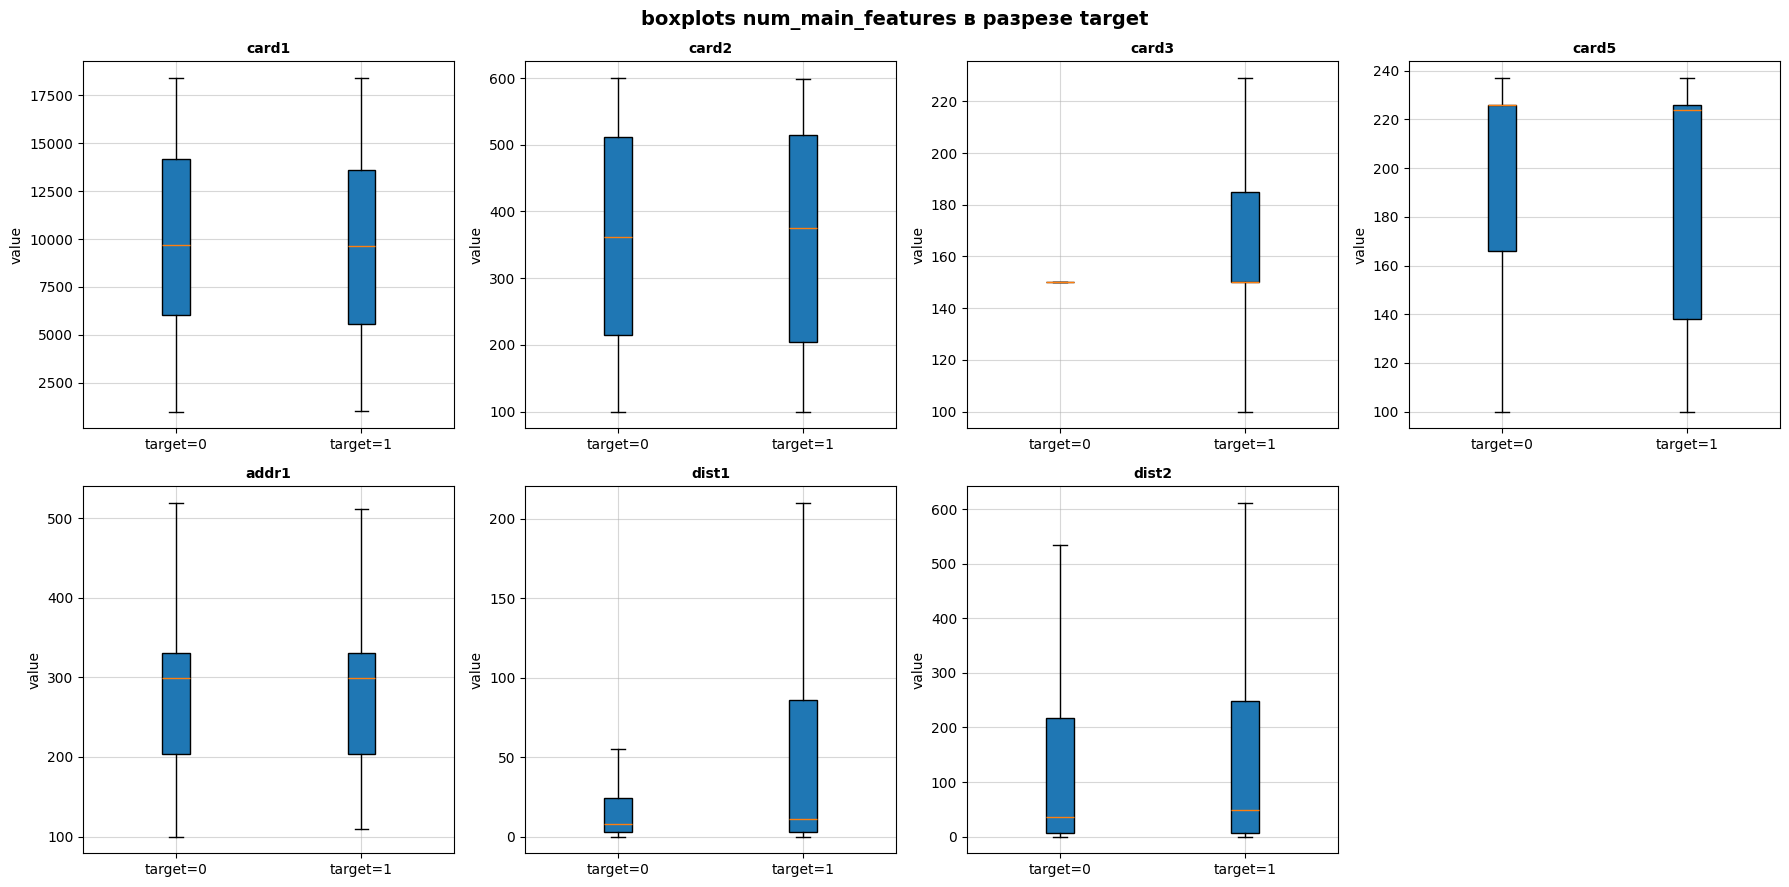

In [20]:
# Boxplots
num_main_features = ['card1', 'card2', 'card3', 'card5', 'addr1', 'dist1', 'dist2']

fig, axes = plt.subplots(2, 4, figsize=(18, 9))
axes = axes.flatten()

for idx, feature in enumerate(num_main_features):
    ax = axes[idx]
    
    # box
    box_data = [df_train[df_train['target']==0][feature].dropna().values,
                df_train[df_train['target']==1][feature].dropna().values]
    
    bp = ax.boxplot(box_data, labels=['target=0', 'target=1'], 
                    patch_artist=True, showfliers=False)
        
    ax.set_title(feature, fontsize=10, fontweight='bold')
    ax.set_ylabel('value')
    ax.grid(True, alpha=0.5)

# лишние оси
for i in range(len(num_main_features), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle('boxplots num_main_features в разрезе target', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 4.2.2 other_features_SFA

In [21]:
features = [*c_feat, *d_feat, *m_feat, *v_feat, 'card1', 'card2', 'card3', 'card5', 'addr1', 'dist1', 'dist2']

results_df = sfa_analysis(df_train, features, target='target')

100%|███████████████████████████████████████████████████████████████████████| 358/358 [00:11<00:00, 32.39it/s]


In [22]:
# top 15 показателей по auc
results_df.sort_values('auc', ascending=False)[:15]

,feature,feature_group,auc,gini,iv,corr_%,n_obs,missing_pct
17,D5,D,0.75,0.50,0.81,0.07,163894,53.29
232,V218,V,0.74,0.48,0.68,0.14,79917,77.22
270,V258,V,0.74,0.48,1.15,0.29,79917,77.22
233,V219,V,0.73,0.46,0.67,0.25,79917,77.22
269,V257,V,0.73,0.46,1.10,0.38,79917,77.22
277,V265,V,0.73,0.46,0.64,0.04,79917,77.22
276,V264,V,0.73,0.46,0.64,0.02,79917,77.22
275,V263,V,0.71,0.42,0.62,0.04,79917,77.22
231,V217,V,0.71,0.42,0.55,0.29,79917,77.22
243,V229,V,0.71,0.42,0.73,0.13,79917,77.22


In [23]:
# top 15 показателей по iv
results_df.sort_values('iv', ascending=False)[:15]

,feature,feature_group,auc,gini,iv,corr_%,n_obs,missing_pct
163,V149,V,0.65,0.30,2.44,0.26,50390,85.64
162,V148,V,0.63,0.26,1.79,0.22,50390,85.64
170,V156,V,0.66,0.32,1.72,0.27,50390,85.64
168,V154,V,0.63,0.26,1.47,0.19,50390,85.64
169,V155,V,0.64,0.28,1.46,0.23,50390,85.64
172,V158,V,0.67,0.34,1.27,0.27,50390,85.64
254,V242,V,0.68,0.36,1.22,0.36,79917,77.22
167,V153,V,0.62,0.24,1.22,0.16,50390,85.64
202,V188,V,0.64,0.28,1.22,0.31,84904,75.80
203,V189,V,0.65,0.30,1.19,0.31,84904,75.80
